# PROJECT EV Population in the US

Our project, 'USA Electric Car Trends,' focuses on understanding and predicting the use of electric cars in the United States. We'll use machine learning to study how electric cars are distributed across the country. By looking at factors like where people live, the types of electric cars they use, and government incentives, we aim to give insights into how electric cars are growing in popularity. This research can help with future planning and decisions on electric cars in the USA.


Author 1: Kamel Lehmoudi, up202301437 <br>
Author 2: Moraless Philius, up202302762

TITLE

EV Population US

Charging Station Placement Optimization:

Objective: Predict the demand for electric vehicle charging stations in different locations based on factors such as city, state, and postal code.


## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Preprocessing

In [2]:
df = pd.read_csv("Data/Electric_Vehicle_Population_Data.csv", delimiter=";")

In [3]:
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033004800
1,1C4RJYB61N,King,Bothell,WA,98011,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033021804
2,1C4RJYD61P,Yakima,Yakima,WA,98908,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,53077002900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   VIN (1-10)                                         1999 non-null   object
 1   County                                             1999 non-null   object
 2   City                                               1999 non-null   object
 3   State                                              1999 non-null   object
 4   Postal Code                                        1999 non-null   int64 
 5   Model Year                                         1999 non-null   int64 
 6   Make                                               1999 non-null   object
 7   Model                                              1999 non-null   object
 8   Electric Vehicle Type                              1999 non-null   object
 9   Clean Alternative F

In [5]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [6]:
# DO NOT RUN 
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)
train_df.to_csv("Data/train_dataset.csv", index=False)
test_df.to_csv("Data/test_dataset.csv", index=False)
print(f"shape of the training data set : {train_df.shape}")
print(f"shape of the test data set : {test_df.shape}")

shape of the training data set : (1499, 17)
shape of the test data set : (500, 17)


In [8]:
import numpy as np
#Normalise the data :
import csv

# Load the data using np.genfromtxt
data = np.genfromtxt('Data/Electric_Vehicle_Population_Data3.csv', delimiter=';', dtype=str, skip_header=1)

# Extracting relevant columns
city = data[:, 2]
state = data[:, 3]
postal_code = data[:, 4]
electric_range = data[:, 10] #.astype(float)


# Combine extracted features into a feature matrix
features = np.column_stack((city, state, postal_code, electric_range))
print("features")
print(features)

features
[['Seattle' 'WA' '98103' '258']
 ['Bothell' 'WA' '98011' '25']
 ['Yakima' 'WA' '98908' '25']
 ...
 ['Bellevue' 'WA' '98004' '208']
 ['Kent' 'WA' '98031' '0']
 ['Kent' 'WA' '98042' '0']]



-Predictive Model for Electric Range:
 Objective: Build a model to predict the electric range of vehicles based on features like model year, brand, and electric vehicle type.
:


X_test
[[2.013e+03 6.000e+00 0.000e+00]
 [2.019e+03 2.500e+01 0.000e+00]
 [2.020e+03 3.000e+00 0.000e+00]
 ...
 [2.022e+03 2.200e+01 0.000e+00]
 [2.018e+03 2.800e+01 1.000e+00]
 [2.022e+03 2.500e+01 0.000e+00]]
Mean Squared Error: 6583.729298502985


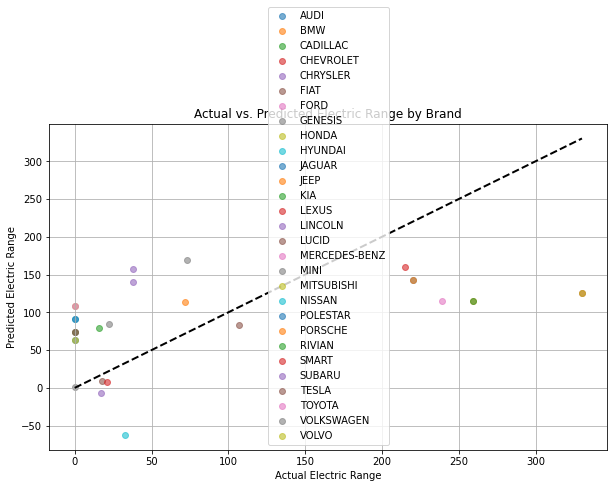

In [9]:
import numpy as np
#Normalise the data :
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# Load the data using np.genfromtxt
data = np.genfromtxt('Data/Electric_Vehicle_Population_Data3.csv', delimiter=';', dtype=str, skip_header=1)

# Extracting relevant columns
model_year = data[:,5]
brand = data[:, 6]
vehicle_type = data[:, 8]
electric_range1 = data[:, 10].astype(float)


# Combine extracted features into a feature matrix
#features = np.column_stack((model_year, brand, vehicle_type, electric_range1))
#print("features")
#print(features)

# Encoding categorical variables: Brand and Vehicle Type
label_encoder_brand = LabelEncoder()
label_encoder_type = LabelEncoder()

brand_encoded = label_encoder_brand.fit_transform(brand)
type_encoded = label_encoder_type.fit_transform(vehicle_type)

# Combine extracted features into a feature matrix
features_encoded = np.column_stack((model_year, brand_encoded, type_encoded, electric_range))

# Splitting features and target variable
X = features_encoded[:, :-1].astype(float)
y = features_encoded[:, -1].astype(float)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing categorical columns using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [1, 2])  # Encodes brand and vehicle type
    ],
    remainder='passthrough'
)

# Linear Regression model in a pipeline with OneHotEncoder for categorical columns
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fitting the model
pipeline.fit(X_train, y_train)
print("X_test")
print(X_test)
# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Evaluating model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

import matplotlib.pyplot as plt
# Plotting graph for predicted vs. actual electric range colored by brand
plt.figure(figsize=(10, 6))
i=0

unique_brands = np.unique(brand)
for b in unique_brands:
     i=i+1
     plt.scatter(y_test[i], y_pred[i], label=b, alpha=0.6)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Electric Range')
plt.ylabel('Predicted Electric Range')
plt.title('Actual vs. Predicted Electric Range by Brand')
plt.legend()
plt.grid()
plt.show()

-Electric Vehicle Adoption Prediction:
Objective: Use historical data to predict the future adoption and growth of electric vehicles in different states or counties.*italicised text*


-Geospatial Analysis of Electric Vehicle Distribution:  
Objective: Visualize and analyze the geographic distribution of electric vehicles across different counties or cities.

-Price Prediction Model:
 Objective: Predict the base MSRP of electric vehicles based on features like brand, model, and model year.



-Customer Segmentation for Electric Vehicles:
Objective: Segment electric vehicle customers based on demographic features to tailor marketing strategies and services.
we can use the model year,the range, type of vehicule,make (brand) ,

brand2
['HYUNDAI' 'JEEP' 'JEEP' ... 'TESLA' 'CHEVROLET' 'HYUNDAI']
features
[['Seattle' 'WA' '98103' '258']
 ['Bothell' 'WA' '98011' '25']
 ['Yakima' 'WA' '98908' '25']
 ...
 ['Bellevue' 'WA' '98004' '208']
 ['Kent' 'WA' '98031' '0']
 ['Kent' 'WA' '98042' '0']]
 brand_counts
[ 46 115   3 127  40  22  89   5   6  57   4  44  94   3   1   1  12   8
  13 243  19  14  20   5  19 847  56  37  49]


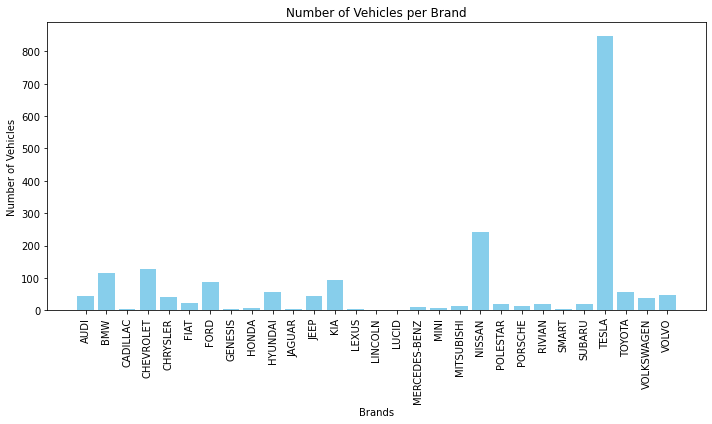

In [26]:
import numpy as np
#data normalised :
import csv

# Load the data using np.genfromtxt
data = np.genfromtxt('Data/Electric_Vehicle_Population_Data3.csv', delimiter=';', dtype=str, skip_header=1)

# Extracting relevant columns
year2 = data[:, 5]
electric_range2 = data[:, 10]
vehicle_type2 = data[:, 8]
brand2 = data[:, 6] #.astype(float)
print("brand2")
print(brand2)

# Combine extracted features into a feature matrix
features2 = np.column_stack((year2,brand2, vehicle_type2, electric_range2))
print("features")
print(features)

brand_counts = brand_counts.astype(int)  # Convert count values to integers
# Extract the unique brands and their counts
unique_brands, brand_counts = np.unique(brand2, return_counts=True)
print(" brand_counts")
print(brand_counts)
# Plotting a bar diagram for brand counts
plt.figure(figsize=(10, 6))
plt.bar(unique_brands, brand_counts, color='skyblue')
plt.xlabel('Brands')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles per Brand')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




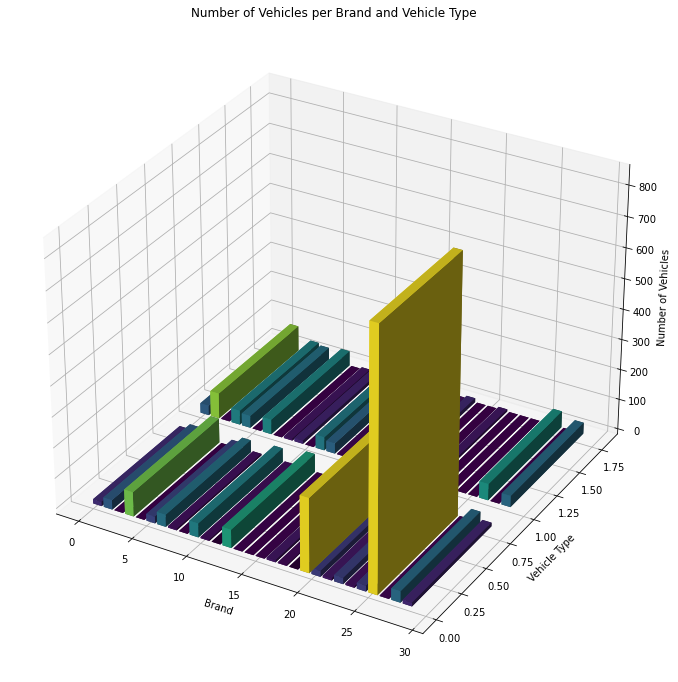

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def get_count_for_brand_and_vehicle_type(brand, vehicle_type, data):
    # Find indices where brand and vehicle_type match
    indices = np.where((data[:, 6] == brand) & (data[:, 8] == vehicle_type))[0]
    
    # Count the occurrences
    count = len(indices)
    return count

# Replace brand2 and vehicle_type2 with variables or column names containing brand and vehicle type data
brand2 = data[:, 6]
vehicle_type2 = data[:, 8]

# Assuming you have already defined unique_brands and unique_vehicle_types from your data
brand_labels = data[:, 6]  # Replace with your brand column
vehicle_type_labels = data[:, 8]  # Replace with your vehicle type column

# Creating a mapping of brand and vehicle type labels to numerical values
brand_to_number = {brand: number for number, brand in enumerate(np.unique(brand_labels))}
vehicle_type_to_number = {vehicle_type: number for number, vehicle_type in enumerate(np.unique(vehicle_type_labels))}

# Converting string brand and vehicle_type labels to numerical values
numerical_brands = [brand_to_number[brand] for brand in brand_labels]
numerical_vehicle_types = [vehicle_type_to_number[vehicle_type] for vehicle_type in vehicle_type_labels]

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D bars
for i, brand in enumerate(np.unique(brand_labels)):
    for j, vehicle_type in enumerate(np.unique(vehicle_type_labels)):
        count = get_count_for_brand_and_vehicle_type(brand, vehicle_type, data)
        ax.bar3d(brand_to_number[brand], vehicle_type_to_number[vehicle_type], 0, 0.8, 0.8, count, color=plt.cm.viridis(count / 100))

ax.set_xlabel('Brand')
ax.set_ylabel('Vehicle Type')
ax.set_zlabel('Number of Vehicles')

plt.title('Number of Vehicles per Brand and Vehicle Type')
plt.show()

In [30]:
# Create reverse mappings: numerical value to brand and vehicle type
number_to_brand = {number: brand for brand, number in brand_to_number.items()}
number_to_vehicle_type = {number: vehicle_type for vehicle_type, number in vehicle_type_to_number.items()}

# Loop through the unique numerical values and print corresponding brand and vehicle type
for number in np.unique(numerical_brands):
    print(f"Numerical value {number} corresponds to brand: {number_to_brand[number]}")

for number in np.unique(numerical_vehicle_types):
    print(f"Numerical value {number} corresponds to vehicle type: {number_to_vehicle_type[number]}")

Numerical value 0 corresponds to brand: AUDI
Numerical value 1 corresponds to brand: BMW
Numerical value 2 corresponds to brand: CADILLAC
Numerical value 3 corresponds to brand: CHEVROLET
Numerical value 4 corresponds to brand: CHRYSLER
Numerical value 5 corresponds to brand: FIAT
Numerical value 6 corresponds to brand: FORD
Numerical value 7 corresponds to brand: GENESIS
Numerical value 8 corresponds to brand: HONDA
Numerical value 9 corresponds to brand: HYUNDAI
Numerical value 10 corresponds to brand: JAGUAR
Numerical value 11 corresponds to brand: JEEP
Numerical value 12 corresponds to brand: KIA
Numerical value 13 corresponds to brand: LEXUS
Numerical value 14 corresponds to brand: LINCOLN
Numerical value 15 corresponds to brand: LUCID
Numerical value 16 corresponds to brand: MERCEDES-BENZ
Numerical value 17 corresponds to brand: MINI
Numerical value 18 corresponds to brand: MITSUBISHI
Numerical value 19 corresponds to brand: NISSAN
Numerical value 20 corresponds to brand: POLESTA